### Challenge Set 4:  Linear Regression and Learning

#### Date Updated:  11/01/15

#### Data Used:  Simulate data

---

### Table of Contents

[Challenge01](#1) 


[Challenge02](#2) 
 

[Challenge03](#3) 
 
 
[Challenge04](#4) 




----

In [1]:
% pylab inline

import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from random import gauss

Populating the interactive namespace from numpy and matplotlib


 ### <a id='1'></a> Challenge 1

Generate (fake) data that is linearly related to $log(x)$

You are making this model up (you're making up the parameters.) 

It is of the form:  $\beta_0 + \beta_1 + log(x) + \epsilon $


Simulate some data from this model.

Then fit two models to it:
 1. quadratic (second degree polynomial)
 2. logarithmic:  $log(x)$

(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
# Simulate data
import random
def simulate_gross(budget_array):
    epsilon_array = [random.gauss(0, residual_stdev) for x in budget_array]
    sim_gross_array = beta_0 + beta_1 * budget_array + epsilon_array
    return sim_gross_array

X:   [  10.           60.20100503  110.40201005  160.60301508  210.8040201 ]


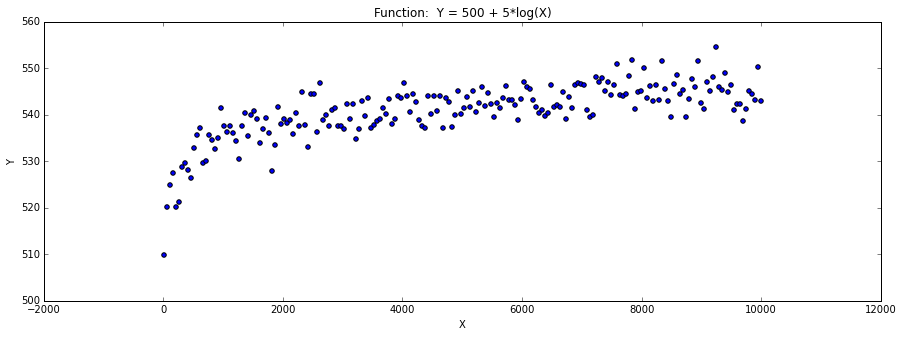

In [3]:
# A function to simulate Y values for given X values
# It simulates them according to the model
# beta_0 + beta_1 log(X) + epsilon
# The beta coefficients and the size of noise is up to you
def simulate_logx_model(x_array, beta_0, beta_1, noise_std):
    epsilon_array = [random.gauss(0, noise_std) for x in x_array]
    y_array = beta_0 + beta_1 * np.log(x_array) + epsilon_array
    return y_array


# Create fake data (200 points)
# I choose the beta 0, beta 1 and noise std values as
# 500, 5 and 3, you can play around with these
# It is your fake data :)

# Example:  numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]
# Returns num evenly spaced samples, calculated over the interval [start, stop].
# 1e4 = 10,000

X = np.linspace(10, 1e4, num = 200)
print "X:  ", X[:5]
Y = simulate_logx_model(X, beta_0=500, beta_1=5, noise_std=3)

# Start a figure with 1x3 subplots
plt.figure(figsize=(15,5))

# Plot fake data
plt.scatter(X,Y)
plt.title('Function:  Y = 500 + 5*log(X)')
plt.xlabel('X')
plt.ylabel('Y')



#### Fit and plot quadratic model

In [4]:
from pprint import pprint 

np.set_printoptions(precision=3)

# Fit and plot quadratic model
# ---first create an input matrix with X^2, X and Ones features
Xsq = X**2
Ones = np.ones(200)
X_input = np.column_stack((Xsq, X, Ones))
# ---now fit

print X_input.shape
print 
print np.array_str(X_input[:5], precision=1, suppress_small=True)

quad_model = sm.OLS(Y,X_input).fit()

(200, 3)

[[   100.      10.       1. ]
 [  3624.2     60.2      1. ]
 [ 12188.6    110.4      1. ]
 [ 25793.3    160.6      1. ]
 [ 44438.3    210.8      1. ]]


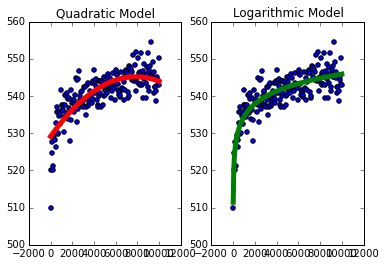

In [5]:
#---plot


plt.subplot(121)
plt.scatter(X,Y)
plt.plot(X, quad_model.predict(X_input), 'r-', linewidth=5)
plt.title("Quadratic Model")

# Fit and plot log x model
# ---input matrix with logX and Ones features
logX = np.log(X)
Ones = np.ones(200)
X_input = np.column_stack((logX,Ones))
# ---fit
logx_model = sm.OLS(Y,X_input).fit()
#---plot
plt.subplot(122)
plt.scatter(X,Y)
plt.plot(X,logx_model.predict(X_input), 'g-', linewidth=5)
plt.title("Logarithmic Model")

### <a id='2'></a> Challenge 2

Generate (fake) data from a model of the form: *$\beta_0 + \beta_1X + \beta_2X^2 + \epsilon$ *

(You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [6]:
from sklearn import cross_validation

X = np.linspace(10,1e4, num = 200)
Y = simulate_logx_model(X, beta_0=500, beta_1=5, noise_std=3)

# Split data in test and train datasets:  
xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(X, Y, test_size=0.30, random_state=4444)

# fit the model to the training set
model = sm.OLS(ytrain, xtrain).fit()

# measure training error: 
Y_train_pred = model.predict(xtrain)
train_err = mean_squared_error(ytrain,Y_train_pred)
print 'Training Error:\t',train_err

# measure MSE testing error:
Y_test_pred = model.predict(xtest)
test_err = mean_squared_error(ytest, Y_test_pred)
print 'Testing Error:\t',test_err

Training Error:	70170.3705818
Testing Error:	74301.8183374


### <a id='3'></a> Challenge 3

For the data from Challenge 2, try polynomial fits from 0th (just constant) to 7th order (highest term $X^7$). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:

## Make a function to create an input matrix with the poly deg. of X
# with vectors X,, X**2.. 

X = np.linspace(10,1e4, num = 200)
Y = simulate_logx_model(X, beta_0=500, beta_1=5, noise_std=3)


def gen_exp_df(X,deg):
    df=pd.DataFrame()
    df['X^1']=X
    df['X^0']=1
    if deg >=2:
        for i in range(2,deg+1):
            new_Series=(X)**i
            df['X^'+str(i)]=new_Series
    return df

# testing.. 
df = gen_exp_df(X,3)
df.head()

,X^1,X^0,X^2,X^3
0,10.000000,1,100.000000,1000.000000
1,60.201005,1,3624.161006,218178.134936
2,110.402010,1,12188.603823,1345646.361780
3,160.603015,1,25793.328451,4142486.318109
4,210.804020,1,44438.334891,9367779.641497


In [9]:
# Another function to fit a polynomial model for a 
# given X

def fit_poly_model(X,Y,deg):
    poly_input = gen_exp_df(X,deg)
    poly_model = LinearRegression()
    poly_model.fit(poly_input,Y)
    return poly_model

print fit_poly_model(X,Y,3).coef_

[  7.831e-03  -8.254e-11  -1.151e-06   5.940e-11]


In [10]:
# Set Y into DF, so that we can index
DF=pd.DataFrame()
DF['Y']=Y

test_length=int(len(DF)*.25)


# split X & Y into testing / training sets
random.seed(4444)
test_rows=random.sample(DF.index,test_length)
X_test=df.ix[test_rows]
Y_test=DF.ix[test_rows]
X_train=df.drop(test_rows)
Y_train=DF.drop(test_rows)

print len(X_train)

150


[Degree 0]   Training err: 17.4704   Testing err: 11.188
[Degree 1]   Training err: 17.4704   Testing err: 11.188
[Degree 2]   Training err: 12.302   Testing err: 11.5668
[Degree 3]   Training err: 11.5862   Testing err: 8.55339
[Degree 4]   Training err: 10.7399   Testing err: 9.17382
[Degree 5]   Training err: 12.277   Testing err: 10.3606
[Degree 6]   Training err: 14.4214   Testing err: 12.1287
[Degree 7]   Training err: 16.8551   Testing err: 13.7959


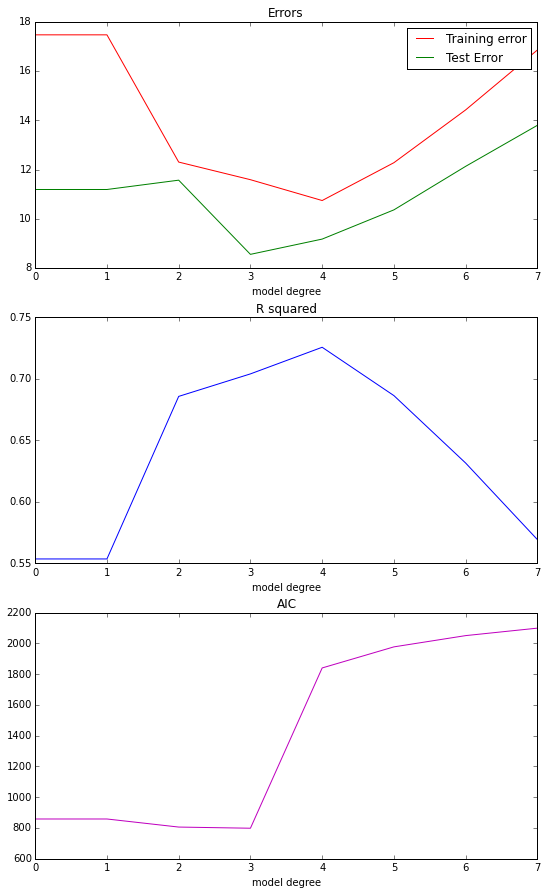

In [11]:
#For each degree from 1 to 7, fit a polynomial and record the test and training errors
degrees = []
training_errors = []
test_errors = []
r2s = []
aics=[]


for degree in range(0,8):
    poly_model=fit_poly_model(X,Y,degree)
    
    
    # get our X_df: 
    df=pd.DataFrame()
    df=gen_exp_df(X,degree)
    
    # get our Y_DF:
    DF=pd.DataFrame()
    DF['Y']=Y
    
    # get our training  /test
    random.seed(4444)
    test_rows=random.sample(DF.index,test_length)
    X_test=df.ix[test_rows]
    Y_test=DF.ix[test_rows]
    X_train=df.drop(test_rows)
    Y_train=DF.drop(test_rows)
    
    # training_error
    X_train_input=gen_exp_df(X_train['X^1'],degree)
    Y_train_pred=poly_model.predict(X_train_input)
    train_err=mean_squared_error(Y_train,Y_train_pred)
    training_errors.append(train_err)
    
    # testing error
    X_test_input=gen_exp_df(X_test['X^1'],degree)
    Y_test_pred=poly_model.predict(X_test_input)
    test_err=mean_squared_error(Y_test,Y_test_pred)
    test_errors.append(test_err)
    
    #R squared
    r_squared=r2_score(Y_train,Y_train_pred)
    r2s.append(r_squared)
    
    #AIC:
    aic=sm.OLS(Y_train,X_train_input).fit().aic
    aics.append(aic)
    
    print '[Degree %i]   Training err: %g   Testing err: %g'  %(degree, train_err, test_err)
    degrees.append(degree)
# Plot Errors
plt.figure(figsize=(9,15))
plt.subplot(311)
tr, = plt.plot(degrees, training_errors, color='red')
te, = plt.plot(degrees, test_errors, color='green')
plt.legend((tr,te), ('Training error', 'Test Error'), loc='upper right')
plt.title("Errors")
plt.xlabel("model degree")

# Plot R^2
plt.subplot(312)
plt.plot(degrees, r2s, 'b-')
plt.title("R squared")
plt.xlabel("model degree")

# Plot AIC
plt.subplot(313)
plt.plot(degrees, aics, 'm-')
plt.title("AIC")
plt.xlabel("model degree")

### <a id='4'></a> Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. 
Plot both (in the same plot) over m. This is called a learning curve.

In [12]:
# DF : just X's and ones.. 
df=pd.DataFrame()
df['X']=X
df['Ones']=1
df['Y']=Y

In [13]:
def fit_poly_model(X,Y,deg):
    poly_input = gen_exp_df(X,deg)
    poly_model = LinearRegression()
    poly_model.fit(poly_input,Y)
    return poly_model

In [14]:
def model(X,Y):
    poly_model = LinearRegression()
    poly_model.fit(X,Y)
    return poly_model


m_s = []
train_errs = []
test_errs = []

# 20 iterations. . 
stages=20

# get our training  /test
random.seed(4444)
test_rows = random.sample(df.index,test_length)
X_test = df[['X','Ones']].ix[test_rows]
Y_test = df[['Y']].ix[test_rows]

X_train = df[['X','Ones']].drop(test_rows)
Y_train = df[['Y']].drop(test_rows)


for i in range(1,stages):
    m=(i*10)
    this_df=df[:m]
    lin_model=model(this_df[['Ones','X']],this_df.Y)
    
    # Training err
    Predict_Y=lin_model.predict(X_train)
    train_err=mean_squared_error(Y_train,Predict_Y)
    train_errs.append(train_err)
    
    
    # Testing err
    Predict_Y_test=lin_model.predict(X_test)
    test_err=mean_squared_error(Y_test,Predict_Y_test)
    test_errs.append(test_err)
    
    m_s.append(m)
    

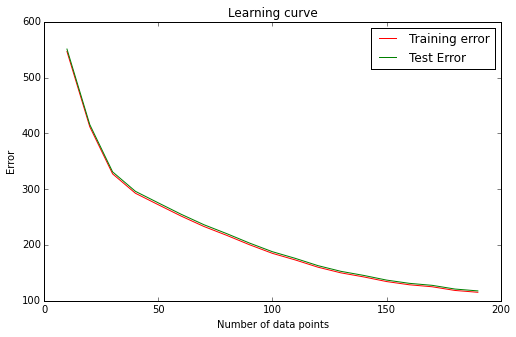

In [16]:
# Plot full learning curve (~200 points)


plt.figure(figsize=(18,5))
plt.subplot(121)
tr, = plt.plot(m_s, train_errs, color='red')
te, = plt.plot(m_s, test_errs, color='green')
plt.legend((tr,te), ('Training error', 'Test Error'), loc='upper right')
plt.title("Learning curve")
plt.xlabel("Number of data points")
plt.ylabel("Error")


    